In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
df=pd.read_csv("Iris.csv")

In [43]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
print(df.dtypes)


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [45]:
print(df.columns.tolist())


['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [46]:
x=df[['SepalLengthCm', 'SepalWidthCm']].to_numpy()  
y=df["Species"]

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [48]:
# Normalize features
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [49]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.3, random_state=42)

K = 1 -> Accuracy: 0.711
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  8  5]] 

K = 3 -> Accuracy: 0.844
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  2 11]] 

K = 5 -> Accuracy: 0.822
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  3 10]] 

K = 7 -> Accuracy: 0.800
Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  4  9]] 

K = 9 -> Accuracy: 0.822
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  2 11]] 



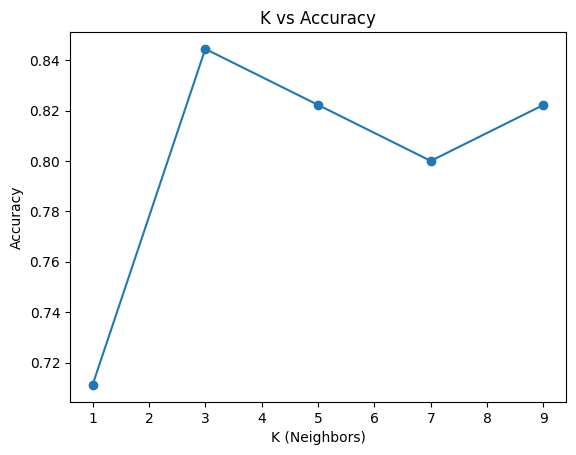

In [50]:
# Try different values of K
k_values = [1, 3, 5, 7, 9]
acc_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
    cm = confusion_matrix(y_test, y_pred)
    print(f"K = {k} -> Accuracy: {acc:.3f}")
    print("Confusion Matrix:")
    print(cm, "\n")

plt.plot(k_values, acc_scores, marker='o')
plt.xlabel("K (Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

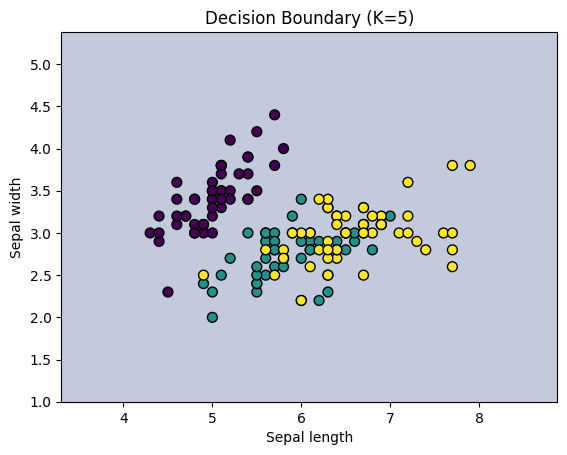

In [51]:

best_k = 5
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_scaled, y_encoded)

# Create a grid of points
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolor='k', s=50)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title(f"Decision Boundary (K={best_k})")
plt.show()